In [2]:
#Import neccessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


In [3]:
#Read in the different datasets
#Read in store
store=pd.read_csv('../data/store.csv')
#Read in test data
test=store_data=pd.read_csv('../data/test.csv')

#Read in train data 
train=store_data=pd.read_csv('../data/train.csv')

#Read in sample submission 
sample_submission=store_data=pd.read_csv('../data/sample_submission.csv')

train.shape, test.shape, store.shape

/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


((1017209, 9), (41088, 8), (1115, 10))

In [4]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
#Extract Day, Month, Year weekdays, weekends , number of days to holidays , number of days after holiday , begining of monthe, mid month, end of month, 
train.Date = pd.to_datetime(train.Date)
train['Day'] = train.Date.dt.day
train['Month'] = train.Date.dt.month
train['Year'] = train.Date.dt.year
train['Weekday'] = train.Date.dt.weekday
train['Month_start'] = train.Date.dt.is_month_start
train['Month_end'] = train.Date.dt.is_month_end



train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,Weekday,Month_start,Month_end
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015,4,False,True
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015,4,False,True
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015,4,False,True
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,7,2015,4,False,True
4,5,5,2015-07-31,4822,559,1,1,0,1,31,7,2015,4,False,True


In [7]:
#Extract Day, Month, Year weekdays, weekends , number of days to holidays , number of days after holiday , begining of monthe, mid month, end of month, 
test.Date = pd.to_datetime(test.Date)
test['Day'] = test.Date.dt.day
test['Month'] = test.Date.dt.month
test['Year'] = test.Date.dt.year
test['Weekday'] = test.Date.dt.weekday
test['Month_start'] = test.Date.dt.is_month_start
test['Month_end'] = test.Date.dt.is_month_end
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,Weekday,Month_start,Month_end
0,1,1,4,2015-09-17,1.0,1,0,0,17,9,2015,3,False,False
1,2,3,4,2015-09-17,1.0,1,0,0,17,9,2015,3,False,False
2,3,7,4,2015-09-17,1.0,1,0,0,17,9,2015,3,False,False
3,4,8,4,2015-09-17,1.0,1,0,0,17,9,2015,3,False,False
4,5,9,4,2015-09-17,1.0,1,0,0,17,9,2015,3,False,False


In [8]:
#Let us encode our data 

month_start_encoder = preprocessing.LabelEncoder()
month_end_encoder = preprocessing.LabelEncoder()
date_encoder = preprocessing.LabelEncoder()
state_hol_encoder = preprocessing.LabelEncoder()
day_encoder = preprocessing.LabelEncoder()
month_encoder = preprocessing.LabelEncoder()
year_encoder = preprocessing.LabelEncoder()
weekday_encoder = preprocessing.LabelEncoder()
#sales_encoder = preprocessing.LabelEncoder()
#customers_encoder = preprocessing.LabelEncoder()

train['Month_start'] = month_start_encoder.fit_transform(train['Month_start'])
train['Month_end'] = month_end_encoder.fit_transform(train['Month_end'])
train['Date'] = date_encoder.fit_transform(train['Date'])
train['Day'] = day_encoder.fit_transform(train['Day'])
train['Month'] = month_encoder.fit_transform(train['Month'])
train['Year'] = year_encoder.fit_transform(train['Year'])
train['Weekday'] = weekday_encoder.fit_transform(train['Weekday'])
#train['Sales'] = sales_encoder.fit_transform(train['Sales'])
#train['Customers'] = customers_encoder.fit_transform(train['Customers'])

train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,Weekday,Month_start,Month_end
0,1,5,941,5263,555,1,1,0,1,30,6,2,4,0,1
1,2,5,941,6064,625,1,1,0,1,30,6,2,4,0,1
2,3,5,941,8314,821,1,1,0,1,30,6,2,4,0,1
3,4,5,941,13995,1498,1,1,0,1,30,6,2,4,0,1
4,5,5,941,4822,559,1,1,0,1,30,6,2,4,0,1


In [38]:
#Let us encode our data 

test_month_start_encoder = preprocessing.LabelEncoder()
test_month_end_encoder = preprocessing.LabelEncoder()
test_date_encoder = preprocessing.LabelEncoder()
test_state_hol_encoder = preprocessing.LabelEncoder()
test_day_encoder = preprocessing.LabelEncoder()
test_month_encoder = preprocessing.LabelEncoder()
test_year_encoder = preprocessing.LabelEncoder()
test_weekday_encoder = preprocessing.LabelEncoder()
test_open_encoder = preprocessing.LabelEncoder()
#sales_encoder = preprocessing.LabelEncoder()
#customers_encoder = preprocessing.LabelEncoder()

test['Month_start'] = test_month_start_encoder.fit_transform(test['Month_start'])
test['Month_end'] = test_month_end_encoder.fit_transform(test['Month_end'])
test['Date'] = test_date_encoder.fit_transform(test['Date'])
test['Day'] = test_day_encoder.fit_transform(test['Day'])
test['Month'] = test_month_encoder.fit_transform(test['Month'])
test['Year'] = test_year_encoder.fit_transform(test['Year'])
test['Weekday'] = test_weekday_encoder.fit_transform(test['Weekday'])
test['Open'] = test_open_encoder.fit_transform(test['Open'])
#train['Sales'] = sales_encoder.fit_transform(train['Sales'])
#train['Customers'] = customers_encoder.fit_transform(train['Customers'])

test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,Weekday,Month_start,Month_end
0,1,1,4,47,1,1,0,0,16,1,0,3,0,0
1,2,3,4,47,1,1,0,0,16,1,0,3,0,0
2,3,7,4,47,1,1,0,0,16,1,0,3,0,0
3,4,8,4,47,1,1,0,0,16,1,0,3,0,0
4,5,9,4,47,1,1,0,0,16,1,0,3,0,0


In [9]:
#checking for null values 
train.isnull().sum().sum()

0

In [48]:
#checking for null values 

test.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
Day               0
Month             0
Year              0
Weekday           0
Month_start       0
Month_end         0
dtype: int64

In [39]:
#looks like stateHoliday has an issue we are going to remove it for now
train_clean=train[train.columns[~train.columns.isin(['StateHoliday'])]]
train_clean

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Day,Month,Year,Weekday,Month_start,Month_end
0,1,5,941,5263,555,1,1,1,30,6,2,4,0,1
1,2,5,941,6064,625,1,1,1,30,6,2,4,0,1
2,3,5,941,8314,821,1,1,1,30,6,2,4,0,1
3,4,5,941,13995,1498,1,1,1,30,6,2,4,0,1
4,5,5,941,4822,559,1,1,1,30,6,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,0,1,0,0,0,1,1,0
1017205,1112,2,0,0,0,0,0,1,0,0,0,1,1,0
1017206,1113,2,0,0,0,0,0,1,0,0,0,1,1,0
1017207,1114,2,0,0,0,0,0,1,0,0,0,1,1,0


In [40]:
#looks like stateHoliday has an issue we are going to remove it for now
test_clean=test[test.columns[~test.columns.isin(['StateHoliday'])]]
test_clean

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,Day,Month,Year,Weekday,Month_start,Month_end
0,1,1,4,47,1,1,0,16,1,0,3,0,0
1,2,3,4,47,1,1,0,16,1,0,3,0,0
2,3,7,4,47,1,1,0,16,1,0,3,0,0
3,4,8,4,47,1,1,0,16,1,0,3,0,0
4,5,9,4,47,1,1,0,16,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,0,1,0,0,0,0,0,5,1,0
41084,41085,1112,6,0,1,0,0,0,0,0,5,1,0
41085,41086,1113,6,0,1,0,0,0,0,0,5,1,0
41086,41087,1114,6,0,1,0,0,0,0,0,5,1,0


In [12]:


train_clean.dtypes


Store            int64
DayOfWeek        int64
Date             int64
Sales            int64
Customers        int64
Open             int64
Promo            int64
SchoolHoliday    int64
Day              int64
Month            int64
Year             int64
Weekday          int64
Month_start      int64
Month_end        int64
dtype: object

In [9]:
#scale our data 
#minmax_scaler = MinMaxScaler()
#train_scaled_data = minmax_scaler.fit_transform(train_clean)
#train_scaled_data
#turn it back to a dataframe
#train_scaled_data_df = pd.DataFrame(train_scaled_data)
#train_scaled_data_df
#better way of scaling and converting the scaled data to a dataframe with its columns 
#train_scaled_data_df = pd.DataFrame(minmax_scaler.fit_transform(train_clean),columns =
#                                             train_clean.columns)
#train_scaled_data_df

#scaler = StandardScaler()
# fit with the Item_MRP
#scaler.fit(np.array(train_clean.Item_MRP).reshape(-1,1))
# transform the data
#train_data.Item_MRP = scaler.transform(np.array(train_data.Item_MRP).reshape(-1,1))

In [46]:
#create feature and target column

feature_col =["DayOfWeek", "Date", "Customers", "Open","Promo","SchoolHoliday","Day","Month","Year","Weekday","Month_start","Month_end"]
features_X =train_clean[feature_col]
target_y =train_clean["Sales"]

In [47]:
feature_col_pr =["DayOfWeek", "Date", "Customers", "Open","Promo","SchoolHoliday","Day"]
features_X_pr =train_clean[feature_col_pr]

In [48]:
#reduce number of features in testing 
test_feature_col =["DayOfWeek", "Date","Open","Promo","SchoolHoliday","Day","Month"]
test_feature7 =test_clean[test_feature_col]

In [16]:
features_X

,DayOfWeek,Date,Customers,Open,Promo,SchoolHoliday,Day,Month,Year,Weekday,Month_start,Month_end
0,5,941,555,1,1,1,30,6,2,4,0,1
1,5,941,625,1,1,1,30,6,2,4,0,1
2,5,941,821,1,1,1,30,6,2,4,0,1
3,5,941,1498,1,1,1,30,6,2,4,0,1
4,5,941,559,1,1,1,30,6,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,0,1,0,0,0,1,1,0
1017205,2,0,0,0,0,1,0,0,0,1,1,0
1017206,2,0,0,0,0,1,0,0,0,1,1,0
1017207,2,0,0,0,0,1,0,0,0,1,1,0


In [18]:
features_X_pr

,DayOfWeek,Date,Customers,Open,Promo,SchoolHoliday,Day
0,5,941,555,1,1,1,30
1,5,941,625,1,1,1,30
2,5,941,821,1,1,1,30
3,5,941,1498,1,1,1,30
4,5,941,559,1,1,1,30
...,...,...,...,...,...,...,...
1017204,2,0,0,0,0,1,0
1017205,2,0,0,0,0,1,0
1017206,2,0,0,0,0,1,0
1017207,2,0,0,0,0,1,0


In [17]:
target_y

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1017204        0
1017205        0
1017206        0
1017207        0
1017208        0
Name: Sales, Length: 1017209, dtype: int64

In [13]:
#lab_enc = preprocessing.LabelEncoder()
#target_y_encoded = lab_enc.fit_transform(target_y)
#target_y_encoded

# Building models with sklearn pipelines

In [ ]:
#we shall use 10 estimators and a maximum depth of 3 levels 
#n_estimators = 10
#max_depth = 3
#Using Random Forest 
#random_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=10)
#random_forest.fit(features_X, target_y)



# predict the target on train and test data 
#predict_train = random_forest.predict(features_X)
#predict_test  = random_forest.predict(test)

In [19]:
sample_submission['Sales'].head()

0    0
1    0
2    0
3    0
4    0
Name: Sales, dtype: int64

In [ ]:
#predict_train

In [41]:
#using random forest regressor 
features_X_pr, target_y = make_regression(n_features=7, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(features_X_pr, target_y)

RandomForestRegressor(max_depth=2, random_state=0)

In [43]:
RandomForestRegressor(...)

RandomForestRegressor(n_estimators=Ellipsis)

In [49]:
test_feature7

,DayOfWeek,Date,Open,Promo,SchoolHoliday,Day,Month
0,4,47,1,1,0,16,1
1,4,47,1,1,0,16,1
2,4,47,1,1,0,16,1
3,4,47,1,1,0,16,1
4,4,47,1,1,0,16,1
...,...,...,...,...,...,...,...
41083,6,0,1,0,0,0,0
41084,6,0,1,0,0,0,0
41085,6,0,1,0,0,0,0
41086,6,0,1,0,0,0,0


In [50]:
predict_test=regr.predict(test_feature7)


In [51]:
feature_col_pr =["DayOfWeek", "Date", "Customers", "Open","Promo","SchoolHoliday","Day"]
features_X_pr =train_clean[feature_col_pr]

In [52]:
predict_train=regr.predict(features_X_pr)

In [53]:
# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(target_y, predict_train)**(0.5))


RMSE on train data:  6892.161449962432


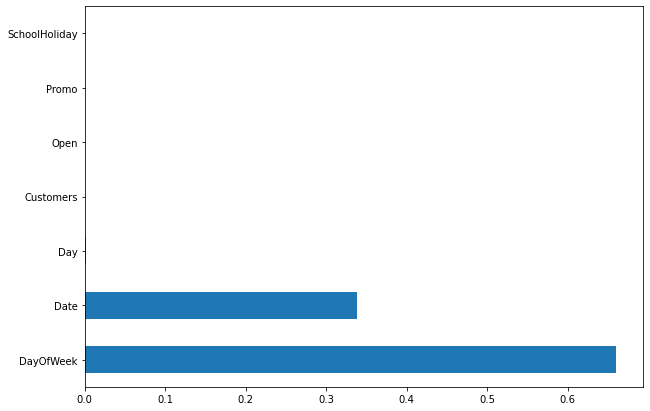

In [54]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(regr.feature_importances_, index = features_X_pr.columns)
feat_importances.nlargest(7).plot(kind='barh');